**Quantum Illumination with Non-Gaussian States - Coherent superposition of photon substraction and addition**

- Author: Longfei Fan
- Created Date: 09/01/2016
- Last Modified: 10/31/2016

# Code

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, factorial
from QI import *
## %matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

### Optimal QCB for coherent superpostion of subtraction and addition

### Nth = 0.1

In [2]:
Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print 's =', s

RA = np.linspace(0.07, 0.12, 21)
TB = np.linspace(0.1, 0.4, 21)
RA, TB = np.meshgrid(RA, TB)
qcb_pcs = []
for ra, tb in zip(np.ravel(RA), np.ravel(TB)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(p_cohe_sub_add, N, s, Nth, rt_list)
    rho_1 = RHO_1(p_cohe_sub_add, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs.append(tr_sqrt)
qcb_pcs = np.array(qcb_pcs)
qcb_pcs = qcb_pcs.reshape(RA.shape)

# save data to file
np.savez('pcs_opt', RA=RA, TB=TB, qcb_pcs=qcb_pcs)

s = 0.0998340788992


In [3]:
print RA.shape, TB.shape, qcb_pcs.shape

(21L, 21L) (21L, 21L) (21L, 21L)


In [4]:
data_qcb_opt = np.load('pcs_opt.npz')

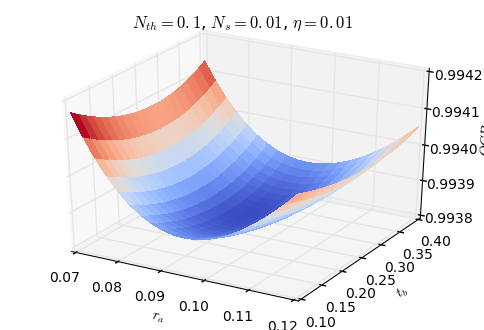

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA, TB, qcb_pcs, \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=0.1$, $N_s=0.01$, $\eta=0.01$')

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()

In [7]:
fig.savefig("QCB_N1e-1.png")

### Nth = 1

In [14]:
Nth = 1       # Average thermal photon numbers
N = 15        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print s

RA_1 = np.linspace(0.10, 0.14, 11)
TB_1 = np.linspace(0.1, 0.5, 11)
RA_1, TB_1 = np.meshgrid(RA_1, TB_1)
qcb_pcs_1 = []
for ra, tb in zip(np.ravel(RA_1), np.ravel(TB_1)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(p_cohe_sub_add, N, s, Nth, rt_list)
    rho_1 = RHO_1(p_cohe_sub_add, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs_1.append(tr_sqrt)
qcb_pcs_1 = np.array(qcb_pcs_1)
qcb_pcs_1 = qcb_pcs_1.reshape(RA_1.shape)
np.savez('pcs_opt_1', RA_1=RA_1, TB_1=TB_1, qcb_pcs_1=qcb_pcs_1)

0.0998340788992


In [15]:
print RA_1.shape, TB_1.shape, qcb_pcs_1.shape

(11, 11) (11, 11) (11, 11)


In [12]:
data_qcb_opt_1 = np.load('pcs_opt_1')

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(data_qcb_opt_1['RA_1'], data_qcb_opt_1['TB_1'], data_qcb_opt_1['qcb_pcs_1'], \
                rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=1.0$, $N_s=0.01$, $\eta=0.01$')

# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(2))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.5f'))

ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(5))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()

KeyError: 'RA_1 is not a file in the archive'

### Nth = 10

In [63]:
Nth = 10      # Average thermal photon numbers
N = 20        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter
print s

RA_10 = np.linspace(0.08, 0.16, 11)
TB_10 = np.linspace(0, 0.3, 11)
RA_10, TB_10 = np.meshgrid(RA_10, TB_10)
qcb_pcs_10 = []
for ra, tb in zip(np.ravel(RA_10), np.ravel(TB_10)):
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))
    rho_0 = RHO_0(PCS, N, s, Nth, rt_list)
    rho_1 = RHO_1(PCS, N, s, Nth, eta, rt_list)
    tr_sqrt = QCB(rho_0, rho_1, approx=True)
    qcb_pcs_10.append(tr_sqrt)
qcb_pcs_10 = np.array(qcb_pcs_10)
qcb_pcs_10 = qcb_pcs_10.reshape(RA_10.shape)
np.savez('pcs_opt_10', RA_10=RA_10, TB_10=TB_10, qcb_pcs_10=qcb_pcs_10)

0.0998340788992


In [64]:
print RA_10.shape, TB_10.shape, qcb_pcs_10.shape

(11, 11) (11, 11) (11, 11)


In [72]:
print [qcb_pcs_10[i][0] for i in xrange(11)]

[0.99386322895315937, 0.99384923862229002, 0.99384399267179158, 0.99384744769340383, -2.8409141909253237e+224, 0.99388033461878611, 0.99390972620842, 0.99394773852420804, 0.99399437582957173, 0.99404965424359482, 0.99411360375238045]


In [73]:
print [qcb_pcs_10[4][i] for i in xrange(11)]

[-2.8409141909253237e+224, 0.99372416154746868, 0.99363747639018496, 0.9935935591641879, 0.99358625056588001, 0.99360958420573742, 0.99365802673226911, 0.99372660495819454, 0.99381095500111749, 0.99390732026892381, 0.99401251808550262]


In [74]:
qcb_pcs_10[4][0] = 0.993861

In [75]:
print qcb_pcs_10

[[ 0.993863  0.993715  0.993618  0.993565  0.993551  0.99357   0.993614
   0.993681  0.993764  0.993859  0.993965]
 [ 0.993849  0.993705  0.993611  0.993562  0.99355   0.99357   0.993617
   0.993684  0.993768  0.993865  0.993971]
 [ 0.993844  0.993703  0.993612  0.993565  0.993555  0.993577  0.993625
   0.993693  0.993778  0.993875  0.993981]
 [ 0.993847  0.99371   0.993621  0.993576  0.993567  0.99359   0.993639
   0.993707  0.993792  0.993889  0.993995]
 [ 0.993861  0.993724  0.993637  0.993594  0.993586  0.99361   0.993658
   0.993727  0.993811  0.993907  0.994013]
 [ 0.99388   0.993747  0.993662  0.993619  0.993612  0.993635  0.993683
   0.993751  0.993834  0.99393   0.994034]
 [ 0.99391   0.993778  0.993694  0.993651  0.993644  0.993666  0.993714
   0.99378   0.993862  0.993956  0.994059]
 [ 0.993948  0.993817  0.993733  0.99369   0.993683  0.993704  0.99375
   0.993815  0.993895  0.993987  0.994088]
 [ 0.993994  0.993865  0.993781  0.993737  0.993728  0.993748  0.993792
   0.9938

In [91]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(RA_10, TB_10, qcb_pcs_10, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('$r_a$')
ax.set_ylabel('$t_b$')
ax.set_zlabel('$QCB$')
ax.set_title('$N_{th}=10$, $N_s=0.01$, $\eta=0.01$')

ax.set_xlim(0.08, 0.16)

ax.zaxis.set_major_locator(LinearLocator(2))
ax.xaxis.set_major_locator(LinearLocator(5))
ax.yaxis.set_major_locator(LinearLocator(4))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# fig.colorbar(qcb_pcs, shrink=0.5, aspect=5)

plt.show()